# Sea Level Predictor

This project was surprisingly easy to accomplish. I think it was helpful that I know the formula of a line and understand how linear regression works. The experience from the previous project regarding various data visualizations made this process more familiar. 

#### Loading and evaluating the data.

In [1]:
# Load the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [17]:
# Load the data from a csv file
df = pd.read_csv('epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [20]:
# Obtain information on the column names, number of entries, and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [13]:
# Obtain the range of values
df['Year'].unique()

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013], dtype=int64)

#### Creating the scatterplot

Text(0.5, 1.0, 'Rise in Sea Level')

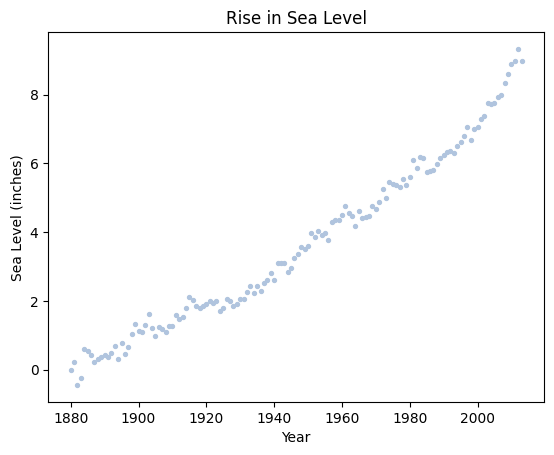

In [56]:
# Create scatter plot.
scatter = plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='lightsteelblue', s=8) # (x, y)

# Add the plot details.
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

#### Plotting the lines of best fit

In [31]:
# Create list of the years (x) to predict later.
# Creates a range from starting number and stops before the last number (not inclusive) by increments of 1.
year_predict1 = pd.Series(range(1880, 2051, 1)); # Supresses the output.
year_predict2 = pd.Series(range(2000, 2051, 1));

In [32]:
# Extract the year values to be inputted as the x.
Year = df['Year']
Recent_Year = df['Year'][df['Year']>=2000]

# Extract the sea level values to be inputted as the y.
Recent_Level = df['CSIRO Adjusted Sea Level'][df['Year']>=2000]

The line of regression is given by the formula:
$$
\hat{Y} = b_0 + b_1 X
$$
The predicted/estimated value of Y for a given X is equal to the intercept plus the slope multiplied by the given X.


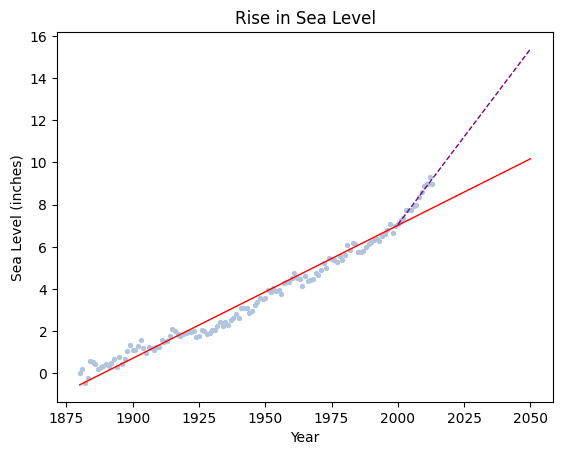

In [57]:
# Calculate a linear least-squares regression from the X and Y values of the data.
reg_predict1 = linregress(Year, df['CSIRO Adjusted Sea Level'])
reg_predict2 = linregress(Recent_Year, Recent_Level)

# Calculate the predicted Y values.
level_predict1 = reg_predict1.intercept + reg_predict1.slope * year_predict1
level_predict2 = reg_predict2.intercept + reg_predict2.slope * year_predict2

# Replotting the scatter plot.
# This was not necessary in the main file, but I had to do this in the notebook.
scatter = plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='lightsteelblue', s=8)

# Plot the predicted Y values given X
plt.plot(year_predict1, level_predict1,'-', color='red', linewidth=1)
plt.plot(year_predict2, level_predict2, '--',  color='purple', linewidth=1)

# Add the plot details.
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

# Save and show the plots.
plt.savefig('sea_level_plot.png')
plt.show()